# Premier modèle de classification - Iris dataset

La communauté du Machine Learning propose un certain nombre de jeux de données prêts à l'emploi, visant chacun à résoudre un problème en particulier (classification, régression, ...). Ces jeux de données sont idéals pour s'initier, s'exercer et expérimenter avec différents types d'architectures ou de manipulations des données. Un de ceux là est le **Iris Flowers dataset**.

## Iris Flower Dataset

L'objectif de ce jeu de données est de prédire la varieté d'une iris à partir de quatre données numériques: la longueur et la largeur des pétales ainsi que la longueur et la largeur des sépales. Il y a dans ce jeu de données trois catégories possibles : *setosa, versicolor et virginica*

Notre objectif est de créer un modèle capable d'associer un ensemble de valeurs à l'une des trois classes présentées ci-dessus. On tente donc de résoudre un problème de **classification**. Enfin, puisque chaque exemple dans notre jeu de données est associée à une classe, on est dans un cas d'**entraînement supervisé**.

# Découvrir les données

En plus de fournir un ensemble de méthodes et d'algorithmes déjà implémentés, scikit-learn propose également certains jeux de données comme le Iris Flowers dataset, pour faciliter l'expérimentation. Les datasets fournis par scikit-learn sont des objets Bunch, similaires à des dictionnaires en python.

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
# on regarde les clés disponibles
# data : ensemble des données
# target : ensemble des classes (numériques)
# target_names : ensemble des classes (textuels)
# DESCR : description du dataset
# feature_names : nom des colonnes
# filename : chemin vers le fichier contenant les données (format csv)
iris_dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Exercice:

Dans le bloc suivant, regardez les différentes clés de 'iris_dataset'.

Exemple : 

``print(iris_dataset['data'])``

In [9]:
# on regarde la desription DESCR du dataset
# print(iris_dataset['DESCR'])
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Visualiser les données

Il est très rare d'avoir une description de ce genre pour un jeu de données. En général, il vous faudra regarder et comprendre les jeu de données par vous-même. Si dans ce cas là le jeu de données est très petit (150 exemples seulement), on a en général affaire à des datasets comprenant plusieurs milliers d'exemples.

Ainsi, la meilleure façon d'observer et de comprendre ses données est de les visualiser, notamment au travers de graphiques, grâce notamment à des librairies comme ``pandas`` et ``matplotlib``. Nous reviendrons plus tard sur ces deux librairies.

In [10]:
import pandas as pd
df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
df['target'] = iris_dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Unable to revert mtime: /Library/Fonts


<AxesSubplot:>

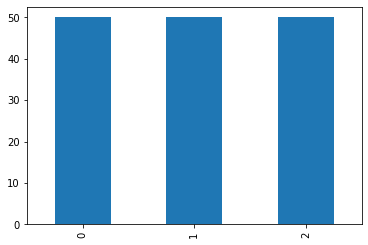

In [6]:
df.target.value_counts().plot.bar()

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSub

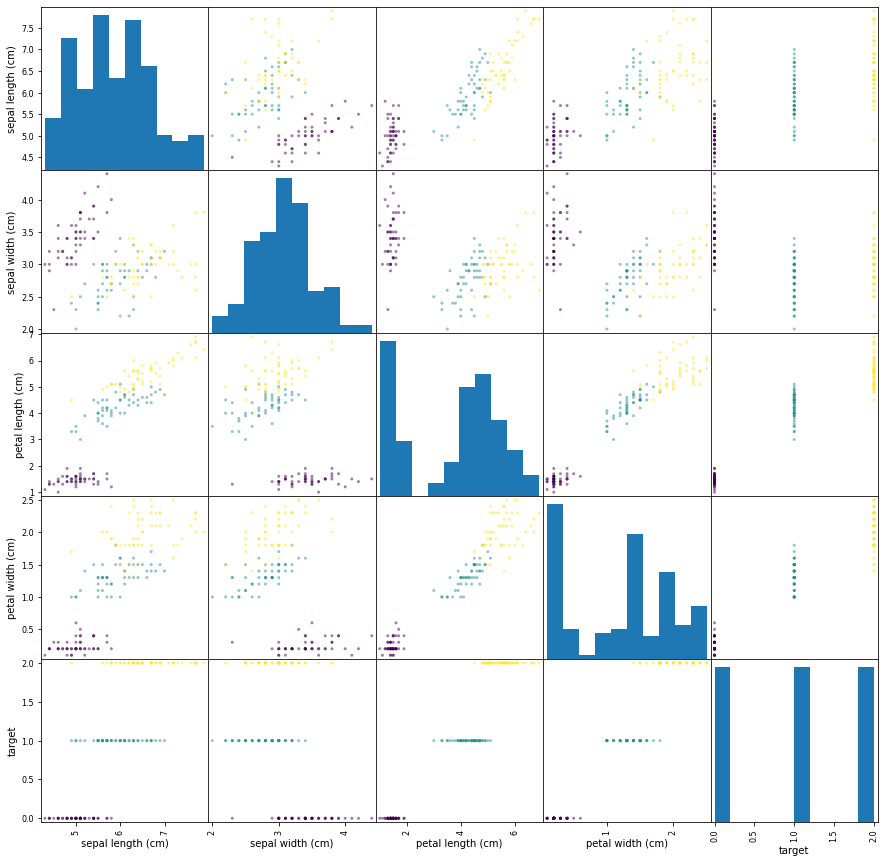

In [8]:
pd.plotting.scatter_matrix(df, c=df['target'], figsize= (15, 15))

## NumPy


 **NumPy** est une librairie de  Python permettant de réaliser des calculs matriciels. Ainsi, tous les travaux et librairies de Machine Learning en Python repose  sur NumPy (scikit-learn, pandas, Pytorch, TensorFlow).

Les données elles-mêmes ne sont pas enregistrées dans des listes python mais dans des **array NumPy**. Un **array** ('tableau' en français) est "une séquence finie d'éléments auxquels on peut accéder efficacement par leur position, ou indice, dans la séquence" ([Wikipédia](https://fr.wikipedia.org/wiki/Tableau_(structure_de_donn%C3%A9es))). Les arrays sont les types de données de base de NumPy. Comme les autres types en Python (list, string, dict, ...), il possède ses propres attributs et fonctions.
 

In [9]:
# on regarde les données
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
print("Type des données :", type(iris_dataset['data']))

Type des données : <class 'numpy.ndarray'>


Les données sont enregistrées sous forme de matrice: chaque ligne correspond à un exemple (**sample**) tandis que chaque colonne représente une caractéristique (**feature**) de cette exemple.

Le Iris Flowers Dataset comporte 150 observations d'iris. Il contient donc 150 exemples ou samples. On indique quatre caractéristique pour chaque observation: la longueur et la largeur du sépal, ainsi que la longueur et la largeur du pétal. 

Ainsi, le Iris Flowers Dataset est une matrice de 150 x 4.

On représente les matrice avec NumPy avec un array contenant d'autres array. Ainsi, pour voir la forme d'une matrice avec NumPy, on utilise la propriété ``shape``.

In [7]:
print("Forme de l'array :", iris_dataset['data'].shape)

Forme de l'array : (150, 4)


## Exercice:

Regardez la colonne 'target', son type et sa forme. Que remarquez-vous sur les données ainsi que sur la forme ?

In [9]:
# on regarde les classes (target)
print("Targets :", iris_dataset['target'])

Targets : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# 'target' est aussi un array
print('Type de données :', type(iris_dataset['target']))

Type de données : <class 'numpy.ndarray'>


'Targets' est une liste contenant la classe associée à chaque exemple / chaque ligne de la matrice 'data'. C'est donc un array n'ayant qu'une seule dimension.

In [11]:
# on regarde la forme de 'target'
print("Forme de l'array : ", iris_dataset['target'].shape)

Forme de l'array :  (150,)


On remarque que les valeurs de 'target' sont comprises entre 0 et 2, au lieu d'être 'versicolor', 'virginica' et 'setosa'. Ceci est dû au fait que les données d'entrée pour un modèle de Machine Learning doivent être numériques, et ne peuvent pas être textuelles. 

Ainsi, dans un problème de classification, lorsque les classes sont représentées sous forme de texte, il est préférable de les encoder numériquement.

## Préparer les données

### Train, validation, test datasets

Nous voulons créer un modèle capable de classer de nouvelles fleurs parmis l'une des trois catégories possibles. Pour cela, nous avons besoin de **données d'entraînement** contenant des descriptions de différentes fleurs. En observant ces descriptions ainsi que la classe associée à chaque exemple, le modèle apprend de lui-même les paramètres permettant de prédire de nouveaux résultats.

Cependant, afin de voir si l'entraînement se déroule correctement et si le modèle s'améliore, il nous faut pouvoir évaluer le modèle. On a donc pour cela besoin de **données de validation**. 

Enfin, le but final d'un modèle est d'être mis en production afin qu'il catégorise de nouvelles données. Pour simuler cette situation, on utilise des **données de test**, qui sont des données que le modèle ne verra jamais au cours de l'entraînement.

Ainsi, on parle respectivement de **train(ing) set**, de **val(idation) ou de dev set** et de **test set**.

---

La plupart des jeux de données que l'on peut trouver sur Google, Kaggle ou Amazon ou dans le milieu de la recherche propose au moins le train et test dataset. Cependant, d'autres jeux de données tels que le Iris Flowers Dataset ne proposent que le train set, de façon similaires aux données que vous aurez à collecter par vous-mêmes.

Dans cette situation, on peut constituer le val dataset et / ou le test set à partir du train set. Un problème à ne pas oublier cependant est que cela réduit la taille du train set, et peut donc empirer l'entraînement. Ainsi, comme souvent, le plus de données vous avez, le meilleur.

## train_test_split

``train_test_split`` est une fonction proposée par scikit-learn permettant de diviser un dataset entre données d'entraînement et de test. Il divise par défaut les données en 75% pour le train set et 25% pour le test (on peut changer les proportions) après les avoir mélangées.

In [13]:
# pour rappel, la forme des données telle que fournie
data = iris_dataset['data'] # on enregistre les données dans une variable pour simplifier les manipulations
target = iris_dataset['target']
print("Data Shape :", data.shape)
print("Target shape :", target.shape)

Data Shape : (150, 4)
Target shape : (150,)


In [14]:
# on importe la fonction train_test_split
from sklearn.model_selection import train_test_split

# on divise les données brutes en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, # les données d'entraînement
                                                    target, # les classes
                                                    train_size = .50 # taille alloué au train set par rapport à data
                                                    # test_size = .25 # taille allouée au test set par rapport à data. On utilise soit train_size, soit test_size
                                                    # random_state = 42 # définie la manière de mélanger les données. On l'utilise pour reproduire les résultats
                                                    )

In [15]:
# on regarde l'aspect des données d'entraînement
print("Train data Shape :", X_train.shape)
print("Train target shape :", y_train.shape)

Train data Shape : (75, 4)
Train target shape : (75,)


In [16]:
# on regarde l'aspect des données de test
print("Train data Shape :", X_test.shape)
print("Train target shape :", y_test.shape)

Train data Shape : (75, 4)
Train target shape : (75,)


### Exercice:

Reprenez les 3 étapes précédentes dans la cellule ci-dessous, puis modifiez ``train_size``, ``test_size`` et ``random_state``. A chaque test, regardez l'aspect de vos nouveaux datasets. 

In [16]:
## Cellule d'exercice

## Entraîner le modèle

Lorsque le train set et le test set sont prêts, on peut commencer à entraîner un modèle. Pour rappel, un modèle est une fonction mathématique, qui pourra s'adapter plus ou moins bien suivant le problème que l'on essaye de résoudre. Il existe plusieurs dizaines d'algorithmes dédiés à différents types de problèmes en Machine Learning, la plupart étant déjà implémentés dans ``scikit-learn``.

Il faut insister sur le fait qu'il n'y a pas de recettes magique en Machine Learning : un modèle qui produit d'excellents résultats sur un problème peut ne pas du tout fonctionner sur un autre. Il faut donc toujours expérimenter et tester plusieurs modèles, avec plusieurs paramètres, jusqu'à obtenir le modèle le plus performant.

### k-Nearest Neighbors

**k-Nearest Neighbors** est un des algorithmes les plus simples existants, mais qui peut largement suffir à de simples problèmes. Contrairement à d'autres modèles, celui-ci enregistre le train set. Lorsqu'il doit classer une nouvelle donnée, le modèle cherche le point dans le train set qui en est le plus proche puis lui assigne la même classe. 

Le **k** dans son nom correspond au nombre de points dans le train set sur lesquels le modèle va se baser pour comparer. Lorsque k est supérieur à 1, la classe assignée au nouveau point correspond à la classe la plus proche dans le voisinage k.

<img src = 'img/knn.gif'>
Référence: https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners/


In [15]:
# Instantier le modèle
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

Pour entraîner un modèle dans ``scikit-learn``, chaque algorithme possède une fonction ``fit()``. Cette fonction prend toujours en argument les données d'entraînement, et dans des cas d'apprentissage supervisé, prendra également les classes. 

In [16]:
# Entrainement
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Valider l'entraînement

Dans un cadre d'apprentissage supervisé, on utilise le validation set que l'on a créé ou qui est fournit avec les données pour évaluer notre modèle. Il existe plusieurs métriques suivant le problème traité (classification, régression, ...). Pour la classification, on évalue la **précision** du modèle, c'est à dire sa capacité à prédire correctement la classe d'un nouveau point de donnée. Ainsi, plus la précision est élevée et plus un modèle est performant.


De la même manière, tous les algorithmes disponibles dans ``scikit-learn`` possèdent une fonction ``predict()`` qui permet de traiter un nouveau point de donnée.

In [19]:
predictions = knn.predict(X_test)
print("Classes prédites pour le test set : ", predictions)

Classes prédites pour le test set :  [2 1 0 2 0 1 2 0 2 0 2 2 1 0 0 1 1 1 2 0 1 0 0 2 0 2 1 1 0 2 2 2 0 2 2 1 2
 0 1 2 1 0 1 2 2 0 1 0 1 2 0 0 2 1 0 2 1 0 1 1 1 2 2 1 1 2 1 1 1 0 2 1 0 2
 1]


Chaque algorithme implémenté dans ``scikit-learn`` possède sa propre métrique, disponible avec la fonction ``score()``. 

In [17]:
acc = knn.score(X_test, y_test)
print("Précision du modèle :", acc)

Précision du modèle : 0.96


On peut également accéder directement aux métriques à partir de ``scikit-learn``.

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(predictions, y_test)
print("Précision du modèle :", acc)

Précision du modèle : 0.96


Voilà votre tout premier modèle entraîné. GG.

## Prédire de nouveaux résultats - Production

Notre modèle est entraîné et a obtenu d'excellents résultats au cours de l'entraînement. C'est donc le moment de le mettre en production et l'utiliser pour classer des données que l'on n'a jamais vues jusque l. 

In [25]:
import numpy as np
# on simule un nouveau point que l'on veut classer automatiquement
X_new = np.array([[5, 2.9, 1, 0.2],
                  [1, .9, 2, 0.6]
                  
                  
                  ]
                 
                 )

X_new = np.array([[5, 2.9, 1, 0.2, 9]
                  ]
                 
                 )
print("Shape new data :", X_new.shape)

Shape new data : (1, 5)


In [26]:
# on predit la classe de ce nouveau point
prediction = knn.predict(X_new)
print("Prediction :", prediction) # [0]. Le modele a appris avec des classes numeriques
print("Predicted class :", iris_dataset['target_names'][prediction])

ValueError: X has 5 features, but KNeighborsClassifier is expecting 4 features as input.

## Important

Lorsqu'un modèle s'entraîne, il apprend les paramètres à partir des données d'entraînement. Cependant, il y a également des paramètres que l'on peut définir manuellement lorsque l'on créé le modèle lui-même et que l'on appelle ``hyperparamètres``. 

Ces paramètres sont très importants puisqu'ils auront une influence sur la manière dont le modèle s'entraînera, et peuvent donc avoir une influence sur les l'apprentissage (performances, temps, ...). Par exemple, le nombre de voisins que l'on définit à l'instantiation du KNeighborsCLassifier est un hyperparamètre.

# Références et liens

* Présentation de jeux de données standards : https://machinelearningmastery.com/standard-machine-learning-datasets/

* Documentation:
    * KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    * train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html